# Morphological Operators

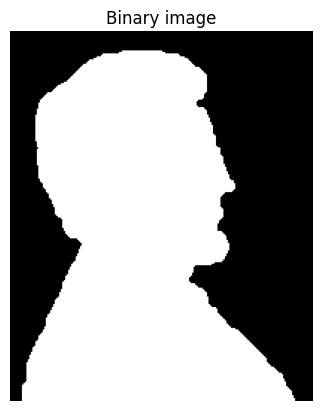

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image as grayscale
img_gray = cv2.imread('input2.png', 0)

# Convert to binary image by using auto-calculate threshold
(thresh, img) = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# Using plt.imshow to display the binary image
plt.imshow(img, cmap='gray')
plt.title('Binary image')
plt.axis('off')  # Turn off axis
plt.show()

## Binary Dilation

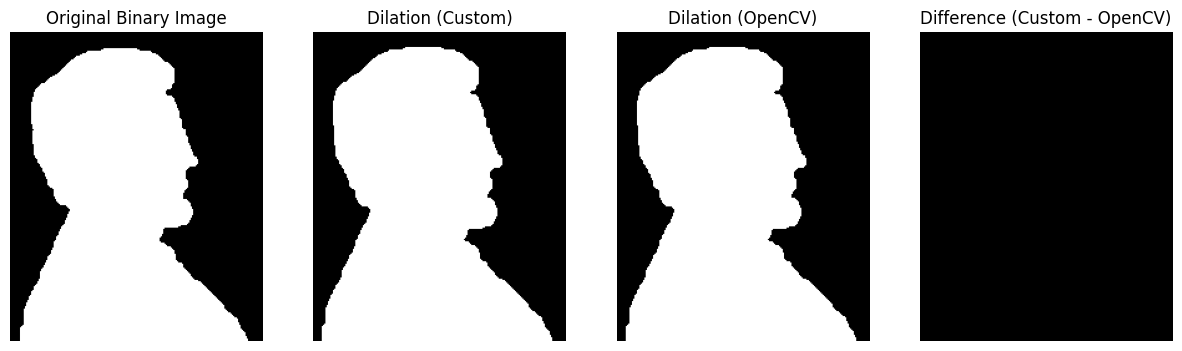

In [27]:
def dilation(img, kernel):
    new_img = np.zeros(img.shape, dtype=np.uint8)

    # Define kernel offset
    offset_x = len(kernel[0]) // 2
    offset_y = len(kernel) // 2

    # Iterate over interior pixels of the image
    for y in range(offset_y, len(img) - offset_y):
        for x in range(offset_x, len(img[0]) - offset_x):
            # Check if the offset of the kernel is within the object boundaries
            if(img[y][x] == 255):
                for i in range(len(kernel)):
                    for j in range(len(kernel[0])):
                        # Perform dilation by setting corresponding pixels in the new_img to 255
                        new_y = y + offset_y - i
                        new_x = x + offset_x - j
                        if kernel[i][j] == 1: 
                            new_img[new_y][new_x] = 255

    return new_img

# Define the dilation kernel
dilation_kernel = np.ones((3, 3), dtype=np.uint8)

# Perform dilation using custom implementation
dilation_img_custom = dilation(img, dilation_kernel)

# Perform dilation using OpenCV
dilation_img_opencv = cv2.dilate(img, dilation_kernel, iterations=1)

# Compute the difference between the custom dilation image and the OpenCV dilation image
dilation_difference = dilation_img_custom - dilation_img_opencv

# Plot original, custom dilation, OpenCV dilation, and difference images side by side
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Binary Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(dilation_img_custom, cmap='gray')
plt.title('Dilation (Custom)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(dilation_img_opencv, cmap='gray')
plt.title('Dilation (OpenCV)')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(dilation_difference, cmap='gray')
plt.title('Difference (Custom - OpenCV)')
plt.axis('off')

plt.show()

## Binary Erosion

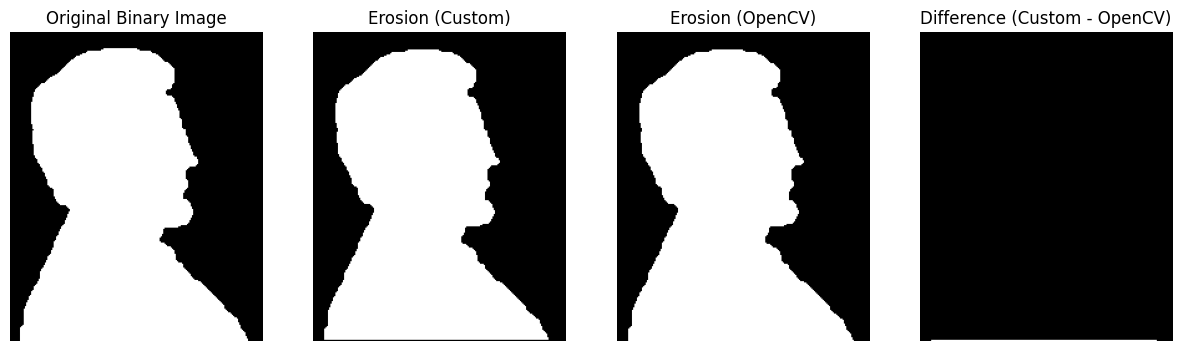

In [28]:
def erosion(img, kernel):
    new_img = np.zeros(img.shape, dtype=np.uint8)

    # Define kernel offset
    offset_x = len(kernel[0]) // 2
    offset_y = len(kernel) // 2

    # Iterate over interior pixels of the image
    for y in range(offset_y, len(img) - offset_y):
        for x in range(offset_x, len(img[0]) - offset_x):
            # Check if the center pixel is white (255)
            if img[y][x] == 255:
                # Check if all the neighboring pixels covered by the kernel are white
                erosion_flag = True
                for i in range(len(kernel)):
                    for j in range(len(kernel[0])):
                        if kernel[i][j] == 1 and img[y+offset_y-i][x+offset_x-j] != 255:
                            erosion_flag = False
                            break
                    if not erosion_flag:
                        break
                # If any neighboring pixel is not white, set the center pixel to black (0) in the new_img
                if erosion_flag:
                    new_img[y][x] = 255
    return new_img

# Define the erosion kernel
erosion_kernel = np.ones((3, 3), dtype=np.uint8)

# Perform erosion using custom implementation
erosion_img_custom = erosion(img, erosion_kernel)

# Perform erosion using OpenCV
erosion_img_opencv = cv2.erode(img, erosion_kernel, iterations=1)

# Compute the difference between the custom erosion image and the OpenCV erosion image
erosion_difference = erosion_img_custom - erosion_img_opencv

# Plot original, custom erosion, OpenCV erosion, and difference images side by side
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Binary Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(erosion_img_custom, cmap='gray')
plt.title('Erosion (Custom)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(erosion_img_opencv, cmap='gray')
plt.title('Erosion (OpenCV)')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(erosion_difference, cmap='gray')
plt.title('Difference (Custom - OpenCV)')
plt.axis('off')

plt.show()

## Binary Opening

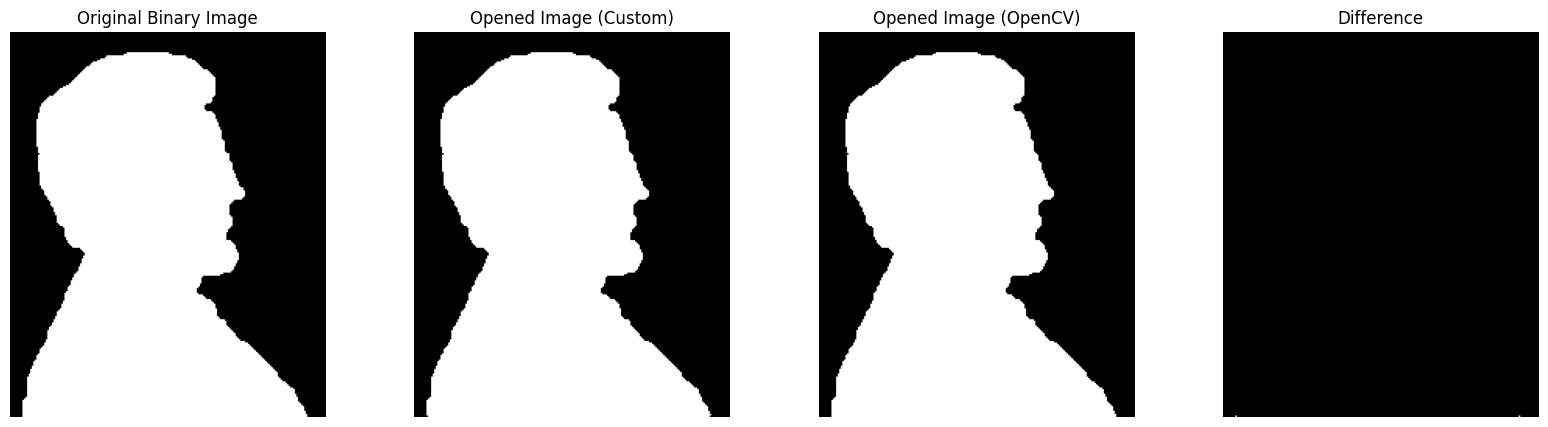

In [29]:
# Define the binary opening kernel
opening_kernel = np.array([[0, 1, 0],
                           [1, 1, 1],
                           [0, 1, 0]], dtype=np.uint8)

def open(img, kernel):
    # Call the erosion function to perform erosion
    eroded_img = erosion(img, kernel)
    opened_img = dilation(eroded_img, kernel)

    return opened_img


# Perform binary opening using custom implementation
opened_img_custom = open(img, opening_kernel)

# Perform binary opening using OpenCV
opened_img_opencv = cv2.morphologyEx(img, cv2.MORPH_OPEN, opening_kernel)

# Compute the absolute difference between the custom and OpenCV opened images
diff_img = np.abs(opened_img_custom.astype(int) - opened_img_opencv.astype(int)).astype(np.uint8)

# Plot original, custom opened, and OpenCV opened images side by side
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Binary Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(opened_img_custom, cmap='gray')
plt.title('Opened Image (Custom)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(opened_img_opencv, cmap='gray')
plt.title('Opened Image (OpenCV)')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(diff_img, cmap='gray')
plt.title('Difference')
plt.axis('off')

plt.show()

## Binary Closing

(-0.5, 202.5, 247.5, -0.5)

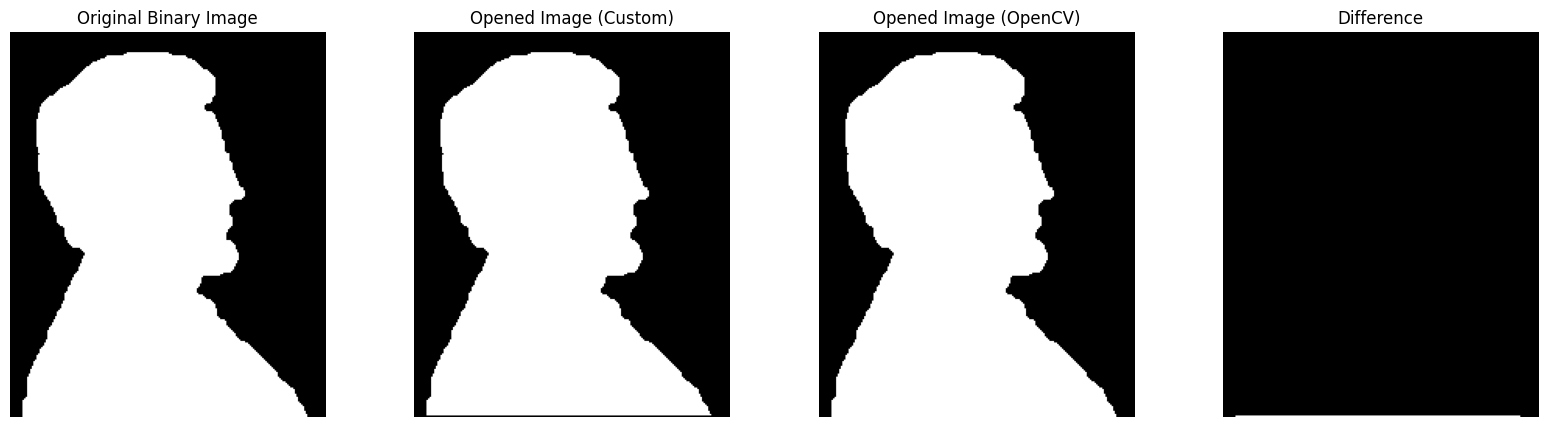

In [36]:
# Define the binary opening kernel
closing_kernel = np.array([[0, 1, 0],
                           [1, 1, 1],
                           [0, 1, 0]], dtype=np.uint8)

def close(img, kernel):
    # Call the erosion function to perform erosion
    closed_img = dilation(img, kernel)
    closed_img = erosion(closed_img, kernel)

    return closed_img

# Perfom binary closing using custom function
closed_img_custom = close(img, closing_kernel)
# Perform binary closing using OpenCV's morphologyEx function
closed_img_opencv = cv2.morphologyEx(img, cv2.MORPH_CLOSE, closing_kernel)

# Compute the absolute difference between the custom and OpenCV opened images
diff_img = np.abs(closed_img_custom.astype(int) - closed_img_opencv.astype(int)).astype(np.uint8)

# Plot original, custom opened, and OpenCV opened images side by side
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Binary Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(closed_img_custom, cmap='gray')
plt.title('Opened Image (Custom)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(closed_img_opencv, cmap='gray')
plt.title('Opened Image (OpenCV)')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(diff_img, cmap='gray')
plt.title('Difference')
plt.axis('off')